In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv("login_hours.csv")
df = df.sort_values(by=['car_number','active_date'],ascending=[True,True])
df = df[df.category != "bike_delivery"]
df = df[df.category != "bike"]
df = df[df.category != "ets_ola"]
df = df[df.category != "electric_vehicle"]
df = df[df.category != "sedan"]
df = df[df.category != "auto"]
df = df[df.category != "exec"]

In [13]:
df["category"] = df["category"].map({'prime':"prime",'prime_play':"prime",'mini':"mini",'economy_suv':"economy_suv",'micro':"micro",'exec':"exec"})
df["category"].value_counts()

prime          338936
mini           133619
economy_suv     39225
micro            7652
Name: category, dtype: int64

In [15]:
df = df[df.active_date>='2018-11-05']

In [18]:
number_of_days = df["car_number"].value_counts()
number_of_days = number_of_days.sort_index()
total_login_hours = df.groupby(["car_number"])["login_hours"].sum()
total_login_hours = total_login_hours.sort_index()

In [20]:
total_login_hours

car_number
A29TV6235       1.370556
AP01TV0906    205.102778
AP02TV1883    158.354167
AP02TV2290      9.025556
AP02TV2579     70.058056
AP02TV6490     72.541667
AP03TB9627     68.873889
AP03TH0545     10.014167
AP03TL3034    109.590278
AP03TV0966    399.916111
AP03TV5840     67.980278
AP03TV6283     46.881944
AP03TV6338     17.883333
AP04TV1532      0.042778
AP04TV2109     75.583056
AP04TV2127     38.507778
AP04TV6065     26.473333
AP04TV6089     34.232778
AP04TV6125     11.743889
AP04TW1711    121.555556
AP04UB1113     12.029444
AP04UB1563     34.110278
AP05TH1074    105.513889
AP05TM1472     22.569722
AP05TV1490     19.495278
AP05TV4218    107.383611
AP05TV4275      4.993056
AP05TV4470     10.621667
AP05TV7349      0.603889
AP05TV7434      5.683333
                 ...    
TS36T0837      88.415833
TS36T0978      23.855556
TS36T1033      17.500278
TS36T1119      19.665278
TS36T1135      19.799167
TS36T1145       0.033611
TS36T1229     203.760556
TS36T1290     245.450833
TS36T1564     

In [29]:
df1 = pd.concat([number_of_days,total_login_hours],axis=1)
df1.columns = ['number_of_days', 'total_login_hours']
df1.describe()

,number_of_days,total_login_hours
count,16679.000000,16679.000000
mean,13.599676,121.307639
std,8.666393,131.404625
min,1.000000,0.004167
25%,5.000000,15.917222
50%,13.000000,70.488889
75%,21.000000,188.092361
max,28.000000,654.311389


In [30]:
df1["login_hours_per_day"] = df1["total_login_hours"]/df1["number_of_days"]

In [35]:
df1["number_of_days/24"] = df1["number_of_days"]/28

In [39]:
df1.describe()

,number_of_days,total_login_hours,login_hours_per_day,number_of_days/24
count,16679.000000,16679.000000,16679.000000,16679.000000
mean,13.599676,121.307639,6.923478,0.485703
std,8.666393,131.404625,4.999522,0.309514
min,1.000000,0.004167,0.004167,0.035714
25%,5.000000,15.917222,2.553512,0.178571
50%,13.000000,70.488889,6.339811,0.464286
75%,21.000000,188.092361,10.364250,0.750000
max,28.000000,654.311389,23.368264,1.000000


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)
df_feat = pd.DataFrame(scaled_features,columns=df1.columns)
df_feat.head()

,number_of_days,total_login_hours,login_hours_per_day,number_of_days/24
0,-1.453898,-0.912758,-1.110724,-1.453898
1,1.084719,0.637707,0.398857,1.084719
2,0.853936,0.281936,0.123455,0.853936
3,-0.415373,-0.854502,-1.204336,-0.415373
4,-0.646156,-0.390025,0.366802,-0.646156


In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [45]:
kmeans.fit(df_feat.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
kmeans.labels_

array([1, 0, 0, ..., 0, 1, 1], dtype=int32)

In [47]:
df_feat["labels"] = kmeans.labels_

1    9694
0    6985
Name: labels, dtype: int64

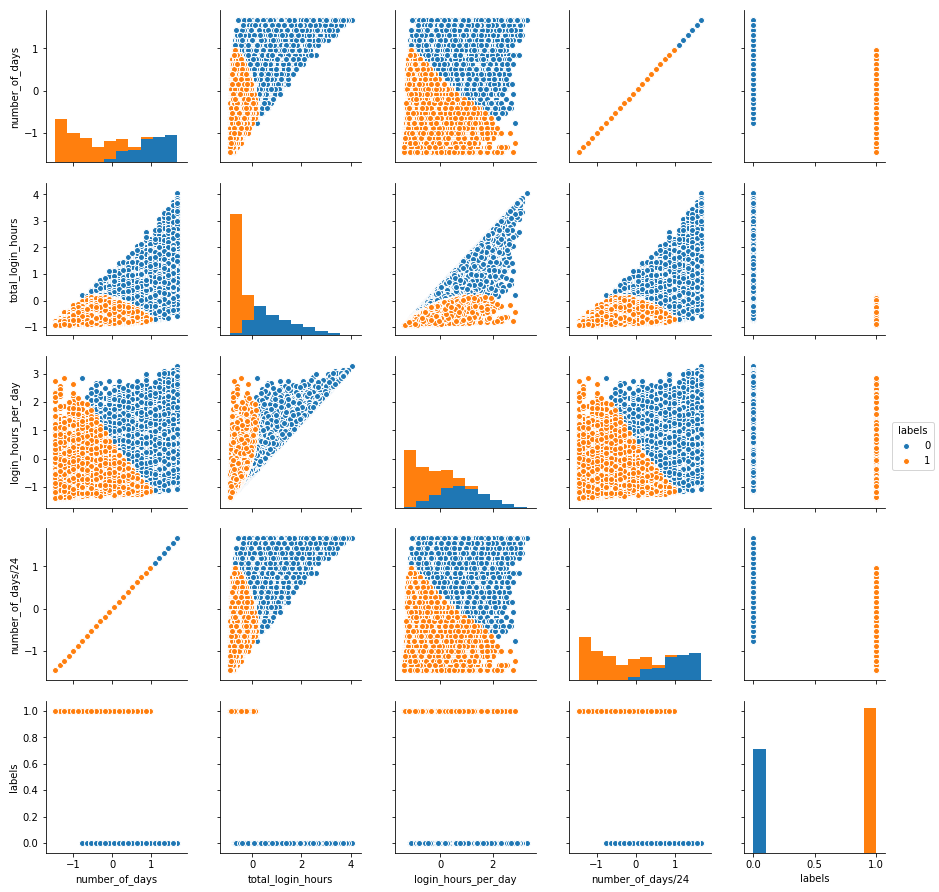

In [49]:
sns.pairplot(df_feat,hue="labels")
print("\n")
df_feat["labels"].value_counts()

In [50]:
df1["labels"] = kmeans.labels_

In [51]:
df1["labels"] = df1["labels"].map({0:"full_timer",1:"part_timer"})

part_timer    9694
full_timer    6985
Name: labels, dtype: int64

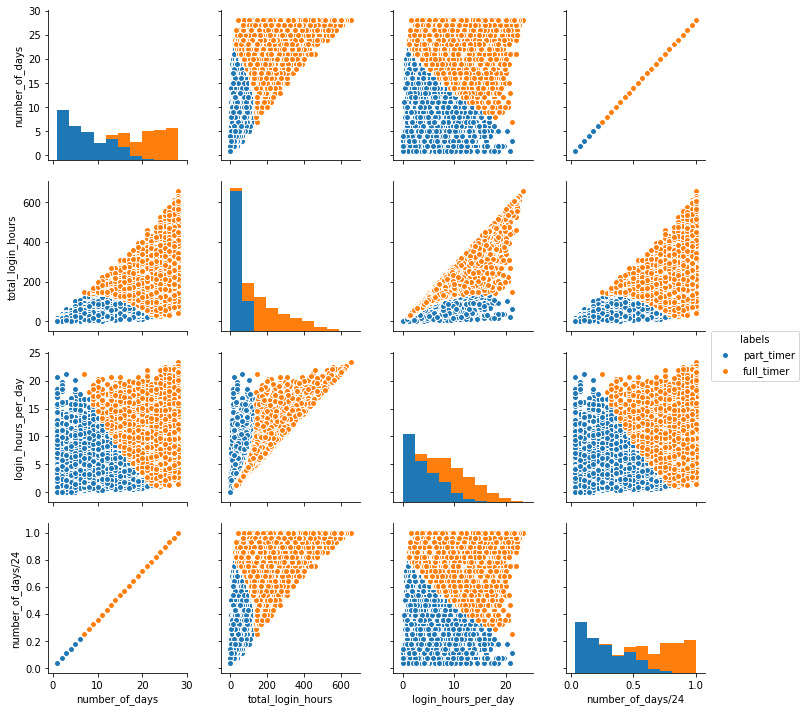

In [52]:
sns.pairplot(df1,hue="labels")
print("\n")
df1["labels"].value_counts()

In [77]:
df1

,number_of_days,total_login_hours,login_hours_per_day,number_of_days/24,labels
car_number,,,,,
A29TV6235,1,1.370556,1.370556,0.035714,0
AP01TV0906,23,205.102778,8.917512,0.821429,1
AP02TV1883,21,158.354167,7.540675,0.750000,1
AP02TV2290,10,9.025556,0.902556,0.357143,0
AP02TV2579,8,70.058056,8.757257,0.285714,0
AP02TV6490,12,72.541667,6.045139,0.428571,0
AP03TB9627,17,68.873889,4.051405,0.607143,0
AP03TH0545,6,10.014167,1.669028,0.214286,0
AP03TL3034,7,109.590278,15.655754,0.250000,1


In [63]:
df2 = df1.drop("number_of_days",axis=1)
df2 = df2.drop("total_login_hours",axis=1)

In [65]:
df2 = df2.drop("labels",axis=1)

In [66]:
scaler = StandardScaler()
scaler.fit(df2)
scaled_features = scaler.transform(df2)
df_feat1 = pd.DataFrame(scaled_features,columns=df2.columns)
df_feat1.head()

,login_hours_per_day,number_of_days/24
0,-1.110724,-1.453898
1,0.398857,1.084719
2,0.123455,0.853936
3,-1.204336,-0.415373
4,0.366802,-0.646156


In [67]:
kmeans.fit(df_feat1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
df2["labels"] = kmeans.labels_
df2["labels"] = df2["labels"].map({0:"part_timer",1:"full_timer"})

0    9170
1    7509
Name: labels, dtype: int64

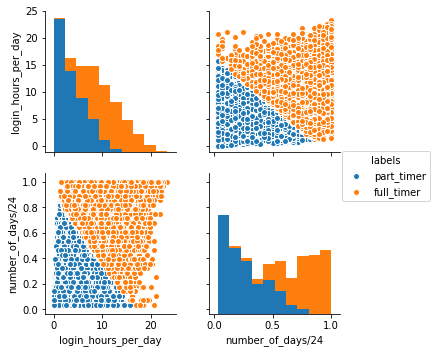

In [75]:
sns.pairplot(df2,hue="labels")
print("\n")
df1["labels"].value_counts()

In [76]:
tempdf = pd.read_csv("login .csv")

In [80]:
tempdf = tempdf[tempdf.cab == "AP03TL3034"]

In [83]:
tempdf

,city,cab,cat,dt,login_hr,active_hr,dryrun_hr,idle_hr
1,hyderabad,AP03TL3034,economy_suv,2018-12-09,23.741389,8.116667,2.066667,12.424722
8084,hyderabad,AP03TL3034,economy_suv,2018-12-05,16.141389,2.650000,0.566667,12.024722
37608,hyderabad,AP03TL3034,economy_suv,2018-12-08,0.416944,0.000000,0.000000,0.416944
40348,hyderabad,AP03TL3034,economy_suv,2018-12-06,16.604722,2.983333,1.066667,11.821389
48443,hyderabad,AP03TL3034,economy_suv,2018-12-03,23.961389,7.283333,1.566667,14.661389
53788,hyderabad,AP03TL3034,economy_suv,2018-12-04,21.958889,5.000000,1.300000,14.975556


,number_of_days,total_login_hours,login_hours_per_day,number_of_days/24,labels
car_number,,,,,
A29TV6235,1,1.370556,1.370556,0.035714,0
AP01TV0906,23,205.102778,8.917512,0.821429,1
AP02TV1883,21,158.354167,7.540675,0.750000,1
AP02TV2290,10,9.025556,0.902556,0.357143,0
AP02TV2579,8,70.058056,8.757257,0.285714,0
AP02TV6490,12,72.541667,6.045139,0.428571,0
AP03TB9627,17,68.873889,4.051405,0.607143,0
AP03TH0545,6,10.014167,1.669028,0.214286,0
AP03TL3034,7,109.590278,15.655754,0.250000,1


0    9170
1    7509
Name: labels, dtype: int64

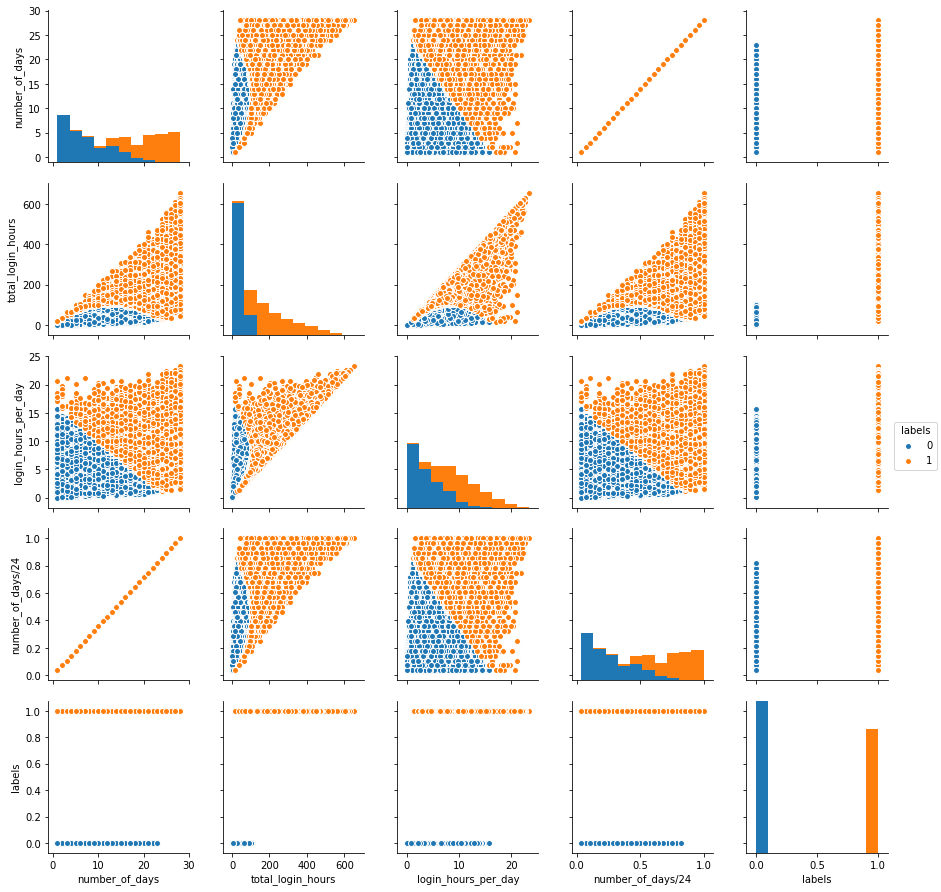

In [85]:
sns.pairplot(df1,hue="labels")
print("\n")
df1["labels"].value_counts()

In [283]:
full_timerdf = df1[df1.labels == 1]

In [284]:
full_timerdf.head()

,number_of_days,total_login_hours,login_hours_per_day,number_of_days/24,labels
car_number,,,,,
AP01TV0906,23,205.102778,8.917512,0.821429,1
AP02TV1883,21,158.354167,7.540675,0.750000,1
AP03TL3034,7,109.590278,15.655754,0.250000,1
AP03TV0966,25,399.916111,15.996644,0.892857,1
AP04TW1711,26,121.555556,4.675214,0.928571,1


In [285]:
tdf = pd.read_csv("login_hours.csv")
tdf = tdf.sort_values(by=['car_number','active_date'],ascending=[True,True])
tdf = tdf[tdf.category != "bike_delivery"]
tdf = tdf[tdf.category != "bike"]
tdf = tdf[tdf.category != "ets_ola"]
tdf = tdf[tdf.category != "electric_vehicle"]
tdf = tdf[tdf.category != "sedan"]
tdf = tdf[tdf.category != "auto"]
tdf = tdf[tdf.category != "exec"]

In [286]:
tdf["category"] = tdf["category"].map({'prime':"prime",'prime_play':"prime",'mini':"mini",'economy_suv':"economy_suv",'micro':"micro",'exec':"exec"})
tdf["category"].value_counts()

prime          338936
mini           133619
economy_suv     39225
micro            7652
Name: category, dtype: int64

In [287]:
tdf = tdf[tdf.wk == 43]

In [288]:
t_number_of_days = tdf["car_number"].value_counts()
t_number_of_days = t_number_of_days.sort_index()
t_total_login_hours = tdf.groupby(["car_number"])["login_hours"].sum()
t_total_login_hours = t_total_login_hours.sort_index()

In [289]:
tdf1 = pd.concat([t_number_of_days,t_total_login_hours],axis=1)
tdf1.columns = ['number_of_days', 'total_login_hours']

In [290]:
tdf1.describe()

,number_of_days,total_login_hours
count,13174.000000,13174.000000
mean,4.407014,38.540433
std,2.078575,36.419467
min,1.000000,0.003333
25%,3.000000,7.414583
50%,5.000000,27.633333
75%,6.000000,60.823264
max,7.000000,172.588889


In [291]:
tdf1["attendancep"] = tdf1["number_of_days"]/7

In [292]:
tdf1["login_hours_per_day"] = tdf1["total_login_hours"]/tdf1["number_of_days"]

In [293]:
tdf1.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,13174.000000,13174.000000,13174.000000,13174.000000
mean,4.407014,38.540433,0.629573,7.318222
std,2.078575,36.419467,0.296939,5.305390
min,1.000000,0.003333,0.142857,0.003333
25%,3.000000,7.414583,0.428571,2.575608
50%,5.000000,27.633333,0.714286,6.762798
75%,6.000000,60.823264,0.857143,11.124216
max,7.000000,172.588889,1.000000,26.223056


In [294]:
full_timerdf

,number_of_days,total_login_hours,login_hours_per_day,number_of_days/24,labels
car_number,,,,,
AP01TV0906,23,205.102778,8.917512,0.821429,1
AP02TV1883,21,158.354167,7.540675,0.750000,1
AP03TL3034,7,109.590278,15.655754,0.250000,1
AP03TV0966,25,399.916111,15.996644,0.892857,1
AP04TW1711,26,121.555556,4.675214,0.928571,1
AP05TH1074,8,105.513889,13.189236,0.285714,1
AP05TV4218,17,107.383611,6.316683,0.607143,1
AP07TM2378,18,219.424444,12.190247,0.642857,1
AP07TV7638,20,201.068056,10.053403,0.714286,1


In [295]:
tdf1 = tdf1.loc[full_timerdf.index.values]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [296]:
tdf1["number_of_days"].value_counts()

7.0    2376
6.0    1462
5.0     925
4.0     650
3.0     446
2.0     326
1.0     241
Name: number_of_days, dtype: int64

In [297]:
tdf1.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,6426.000000,6426.000000,6426.000000,6426.000000
mean,5.424837,59.894723,0.774977,10.387133
std,1.721017,36.634640,0.245860,4.887464
min,1.000000,0.007500,0.142857,0.007500
25%,4.000000,30.715625,0.571429,6.850243
50%,6.000000,56.055000,0.857143,10.414107
75%,7.000000,85.774583,1.000000,13.823044
max,7.000000,172.588889,1.000000,26.223056


In [298]:
tdf1 = tdf1.dropna(how='any',axis=0) 

In [299]:
temp_df = tdf1[tdf1.attendancep>0.62]

In [300]:
temp_df = temp_df[temp_df.login_hours_per_day>7.31]
temp_df

,number_of_days,total_login_hours,attendancep,login_hours_per_day
car_number,,,,
AP02TV1883,7.0,67.331667,1.000000,9.618810
AP07TV7638,7.0,78.666111,1.000000,11.238016
AP07TW2888,7.0,97.375000,1.000000,13.910714
AP09TA6300,7.0,65.983056,1.000000,9.426151
AP09TA7001,7.0,56.677778,1.000000,8.096825
AP09TA7198,7.0,51.688611,1.000000,7.384087
AP09TA9675,6.0,82.791944,0.857143,13.798657
AP09TB0234,7.0,79.106111,1.000000,11.300873
AP09TB0548,7.0,64.947778,1.000000,9.278254


In [307]:
part_timersdf = df1[df1.labels == 0]
part_timersdf

,number_of_days,total_login_hours,login_hours_per_day,number_of_days/24,labels
car_number,,,,,
A29TV6235,1,1.370556,1.370556,0.035714,0
AP02TV2290,10,9.025556,0.902556,0.357143,0
AP02TV2579,8,70.058056,8.757257,0.285714,0
AP02TV6490,12,72.541667,6.045139,0.428571,0
AP03TB9627,17,68.873889,4.051405,0.607143,0
AP03TH0545,6,10.014167,1.669028,0.214286,0
AP03TV5840,12,67.980278,5.665023,0.428571,0
AP03TV6283,15,46.881944,3.125463,0.535714,0
AP03TV6338,6,17.883333,2.980556,0.214286,0


In [304]:
tdf = pd.read_csv("login_hours.csv")
tdf = tdf.sort_values(by=['car_number','active_date'],ascending=[True,True])
tdf = tdf[tdf.category != "bike_delivery"]
tdf = tdf[tdf.category != "bike"]
tdf = tdf[tdf.category != "ets_ola"]
tdf = tdf[tdf.category != "electric_vehicle"]
tdf = tdf[tdf.category != "sedan"]
tdf = tdf[tdf.category != "auto"]
tdf = tdf[tdf.category != "exec"]
tdf["category"] = tdf["category"].map({'prime':"prime",'prime_play':"prime",'mini':"mini",'economy_suv':"economy_suv",'micro':"micro",'exec':"exec"})
tdf = tdf[tdf.wk == 44]
t_number_of_days = tdf["car_number"].value_counts()
t_number_of_days = t_number_of_days.sort_index()
t_total_login_hours = tdf.groupby(["car_number"])["login_hours"].sum()
t_total_login_hours = t_total_login_hours.sort_index()
tdf1 = pd.concat([t_number_of_days,t_total_login_hours],axis=1)
tdf1.columns = ['number_of_days', 'total_login_hours']
tdf1["attendancep"] = tdf1["number_of_days"]/7
tdf1["login_hours_per_day"] = tdf1["total_login_hours"]/tdf1["number_of_days"]
tdf1.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,13581.000000,13581.000000,13581.000000,13581.000000
mean,4.529416,40.615788,0.647059,7.569839
std,2.096485,37.404073,0.299498,5.383849
min,1.000000,0.003056,0.142857,0.003056
25%,3.000000,8.315833,0.428571,2.821111
50%,5.000000,30.333056,0.714286,7.175556
75%,6.000000,64.152778,0.857143,11.381944
max,7.000000,172.675000,1.000000,24.667857


In [305]:
tdf1 = tdf1.loc[part_timersdf.index.values]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [306]:
tdf1.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,5946.000000,5946.000000,5946.000000,5946.000000
mean,3.659771,18.966992,0.522824,4.401928
std,1.949951,21.221663,0.278564,3.721844
min,1.000000,0.004167,0.142857,0.004167
25%,2.000000,3.156944,0.285714,1.303576
50%,4.000000,11.206667,0.571429,3.337361
75%,5.000000,27.645833,0.714286,6.913472
max,7.000000,167.769722,1.000000,23.967103


In [311]:
5946/9694

0.6133690942851249